# TANZANIA WALL WATER CLASSIFICATION ANALYSIS

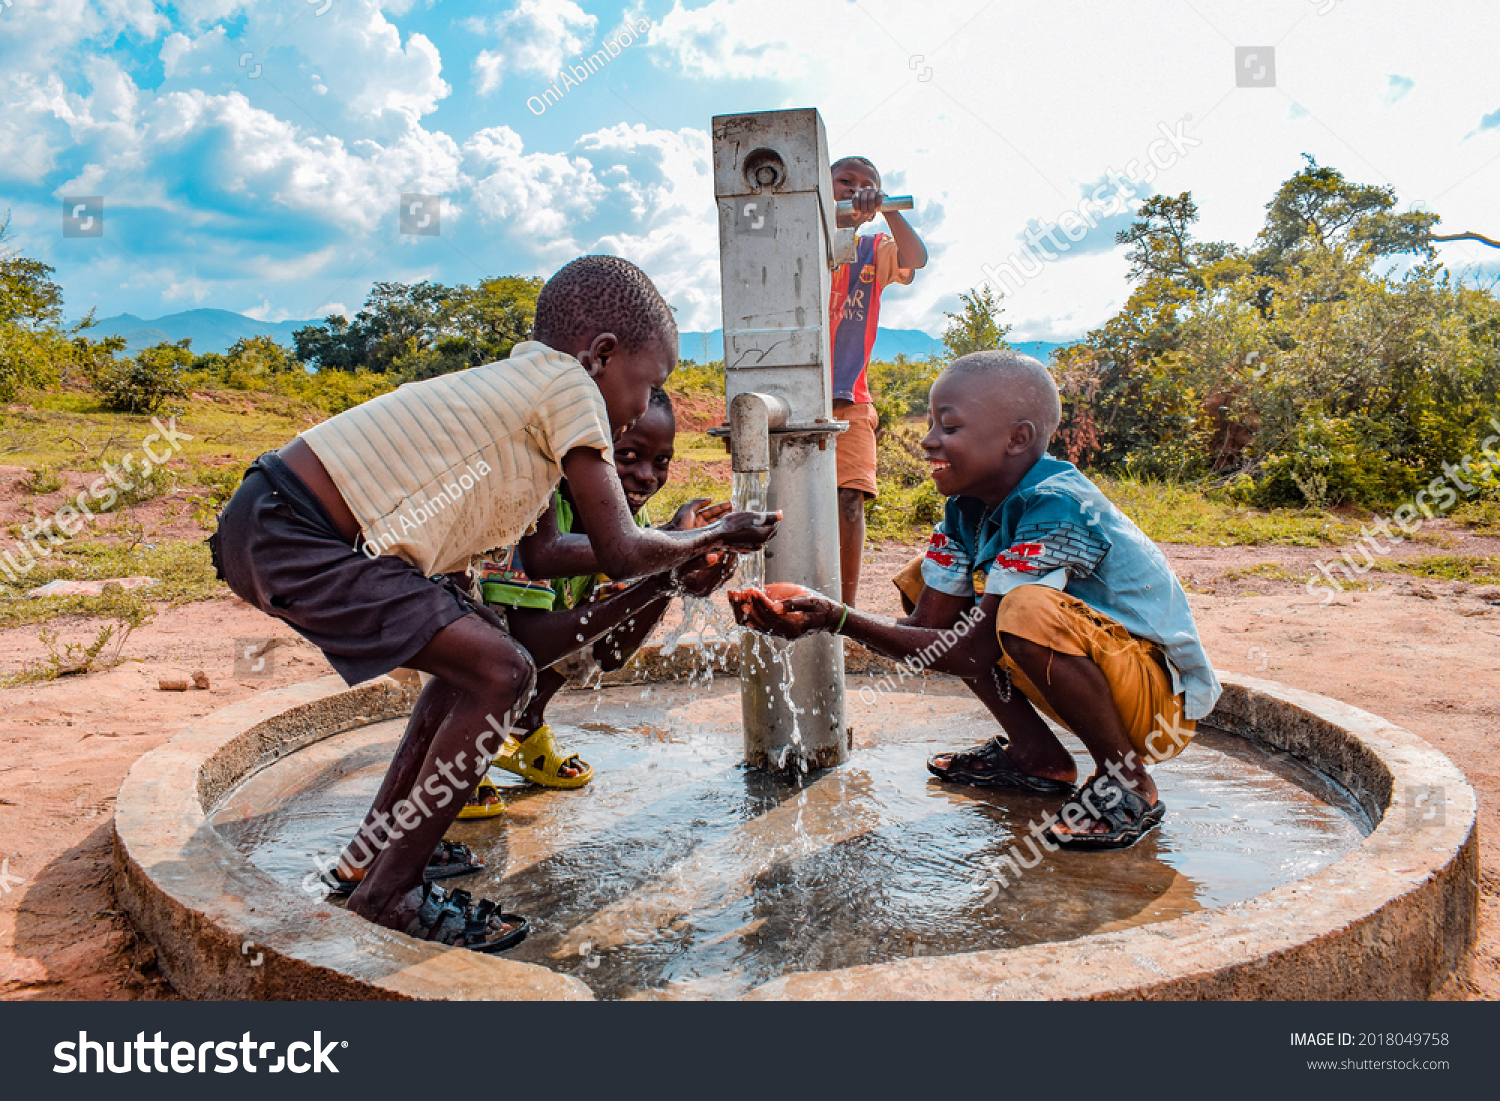

### Business Overview

Tanzania's sustained growth from a low-income to lower-middle- income country mirrors its positive progress towards access to safe water and sanitation for all. Ground water is considered the major source of water for the nation's people; however it's not always clean. This is due to the poor condition exhibited by many of these ground water wells, hence making it hard for the government to achieve it desired goals.

### Business Problem

Tanzania, as a developing country, struggles with providing clean water to its population of over 57,000,000. There are many water points already established in the country, but some are in need of repair while others have failed altogether. Build a classifier to predict the condition of the water wells, using information about the sort of pump, when it was installed, and other important features.

### Aim of the Project

To predict which water pumps are faulty, locating wells needing repair, and also finding patterns in non-functional wells to influence how new wells are built; to promote access to clean, potable water across Tanzania

 ### Data Source

The data used for this project was derived from DRIVENDATA Competitions; for more information concerning the data click the link [Data](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/) to explore.

###  Loading and Reading of Data

In [1]:
# loading the necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels as sm
import warnings
warnings.filterwarnings('ignore')

#Reading and Understanding the datasets.
sub_format = pd.read_csv('SubmissionFormat.csv') #The format for submitting your predictions
#sub_format.head()
train_labels = pd.read_csv('Training set labels.csv') #dependent variable (status_group) 
#train_labels.head()
train_set = pd.read_csv('Training set values.csv')
#train_set.head()
test_set = pd.read_csv('Test set values.csv')
test_set.head()


# vertically (along rows)
data = pd.concat([train_set, test_set], ignore_index=True)

# Merge the labels with features
data = data.merge(train_labels, on = 'id')
data.head()

print(data.columns)

# Droping irrelevant columns
columns_to_drop = ['id', 'recorded_by', 'date_recorded'] #recorded_by has only one value
data = data.drop(columns=columns_to_drop)

# Separate features and target
X = data.drop(columns=['status_group'])
y = data['status_group']



from sklearn.preprocessing import LabelEncoder
# For each categorical column in X
label_encoder = LabelEncoder()
# Checking data types of columns in X
print(X.dtypes)
# Checking a sample of the columns with mixed data types
for column in X.select_dtypes(include=['object']).columns:
    print(f"Unique values in {column}:")
    print(X[column].unique()) 
# For columns with mixed types, convert non-numeric values to NaN and then fill
for column in X.select_dtypes(include=['object']).columns:
    # Try converting the column to numeric (non-numeric values will become NaN)
    X[column] = pd.to_numeric(X[column], errors='coerce')  # 'coerce' will turn non-numeric to NaN
# Now, handle NaN values: fill them
X = X.fillna(0) 

# Splitting Data into Train and Test Sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')
amount_tsh               float64
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     ob

amount_tsh  funder  gps_height  installer  longitude  latitude  \
3607         50.0     0.0        2092        0.0  35.426020 -4.227446   
50870         0.0     0.0           0        0.0  35.510074 -5.724555   
20413         0.0     0.0           0        0.0  32.499866 -9.081222   
52806         0.0     0.0           0        0.0  34.060484 -8.830208   
50091       300.0     0.0        1023        0.0  37.032690 -6.040787   

       wpt_name  num_private  basin  subvillage  ...  payment_type  \
3607        0.0            0    0.0         0.0  ...           0.0   
50870       0.0            0    0.0         0.0  ...           0.0   
20413       0.0            0    0.0         0.0  ...           0.0   
52806       0.0            0    0.0         0.0  ...           0.0   
50091       0.0            0    0.0         0.0  ...           0.0   

       water_quality  quality_group  quantity  quantity_group  source  \
3607             0.0            0.0       0.0             0.0     0.0   
50870            0.0            0.0       0.0             0.0     0.0   
20413            0.0            0.0       0.0             0.0     0.0   
52806            0.0            0.0       0.0             0.0     0.0   
50091            0.0            0.0       0.0             0.0     0.0   

       source_type  source_class  waterpoint_type  waterpoint_type_group  
3607           0.0           0.0              0.0                    0.0  
50870          0.0           0.0              0.0                    0.0  
20413          0.0           0.0              0.0                    0.0  
52806          0.0           0.0              0.0                    0.0  
50091          0.0           0.0              0.0                    0.0  

[5 rows x 37 columns]

 On the cell above, we have imported necessary libraries and read the data sets. we concatenated the train_set with the test_set and then merged the train_label_set to ensure that we are only dealing with one data set making things much easier and flowing. A bit of data cleaning is also evident; dropping irrelevant columns, checking for missing data and filling them. Then proceeded to import the relevant module from scikit-learn to deal with categorical columns, since we can only deal with numerical data.

### Preprocessing the data

* Handle Missing Values
* Feature Engineering
* Encode Categorical Features


In [2]:
#checking for null values.
X_train.isna().sum()

# import SimpleImputer from sklearn.impute
from sklearn.impute import SimpleImputer

# Filling missing values
imputer = SimpleImputer(strategy='most_frequent')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_train.isna().sum()

# Label encoding for categorical variables
from sklearn.preprocessing import LabelEncoder
for col in X_train.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    
# Encode target variable (ternary classification)
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test) 

From scikit-learn we imported SimpleImputer to fill in missing values.

In [3]:
from sklearn.preprocessing import LabelEncoder

# For each categorical column in X
label_encoder = LabelEncoder()

# Applying label encoding for each column that is of type object (string)
for column in X.select_dtypes(include=['object']).columns:
    X[column] = label_encoder.fit_transform(X[column])

# split again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the first few rows after encoding
print(X_train.head())

       amount_tsh  funder  gps_height  installer  longitude  latitude  \
3607         50.0     0.0        2092        0.0  35.426020 -4.227446   
50870         0.0     0.0           0        0.0  35.510074 -5.724555   
20413         0.0     0.0           0        0.0  32.499866 -9.081222   
52806         0.0     0.0           0        0.0  34.060484 -8.830208   
50091       300.0     0.0        1023        0.0  37.032690 -6.040787   

       wpt_name  num_private  basin  subvillage  ...  payment_type  \
3607        0.0            0    0.0         0.0  ...           0.0   
50870       0.0            0    0.0         0.0  ...           0.0   
20413       0.0            0    0.0         0.0  ...           0.0   
52806       0.0            0    0.0         0.0  ...           0.0   
50091       0.0            0    0.0         0.0  ...           0.0   

       water_quality  quality_group  quantity  quantity_group  source  \
3607             0.0            0.0       0.0             0.0     0

In [4]:
#Train a Random Forest Classifier
# Importing the necessary module
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Making predictions
y_pred = clf.predict(X_test)

# Import necessary modules
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Evaluating the performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7248316498316498

Classification Report:
                          precision    recall  f1-score   support

             functional       0.75      0.81      0.78      6457
functional needs repair       0.44      0.32      0.37       851
         non functional       0.72      0.68      0.70      4572

               accuracy                           0.72     11880
              macro avg       0.64      0.60      0.62     11880
           weighted avg       0.72      0.72      0.72     11880


Confusion Matrix:
 [[5221  217 1019]
 [ 399  273  179]
 [1329  126 3117]]


Accuracy: the model achieved an accuracy of approximately (o.725) 72.50% on the test set,  a relatively good score.

Precision: The proportion of positive predictions that were correct.(Higher precision means fewer false positives.)
  * Functional (0.75): 75% of the "functional" predictions were correct.
  * Functional needs repair (0.44): Only 44% of "functional needs repair" predictions were correct.
  * Non-functional (0.72): 72% of "non-functional" predictions were correct.
         
Recall: The proportion of actual positive cases that were correctly predicted. (Higher recall means fewer false negatives.)
  * Functional (0.81): 81% of the actual "functional" cases were correctly identified.
  * Functional needs repair (0.32): Only 32% of the actual "functional needs repair" cases were correctly identified.                                               indicating that the model is struggling to identify this class correctly.
  * Non-functional (0.68): 68% of the actual "non-functional" cases were correctly identified.
  
Confusion Matrix:
First row: Predictions for the "functional" class:
  * 5221 instances correctly predicted as functional.
  * 217 instances incorrectly predicted as functional but were actually functional needs repair.
  * 1019 instances incorrectly predicted as functional but were actually non-functional.

Second row: Predictions for the "functional needs repair" class:
  * 399 instances incorrectly predicted as functional needs repair, but were actually functional.
  * 273 instances correctly predicted as functional needs repair.
  * 179 instances incorrectly predicted as functional needs repair, but were actually non-functional.

Third row: Predictions for the "non-functional" class:
  * 1329 instances incorrectly predicted as non-functional, but were actually functional.
  * 126 instances incorrectly predicted as non-functional, but were actually functional needs repair.
  * 3117 instances correctly predicted as non-functional.

              Feature  Importance
4           longitude    0.282548
5            latitude    0.278500
2          gps_height    0.120030
20  construction_year    0.093140
15         population    0.079476
0          amount_tsh    0.054540
12      district_code    0.036684
11        region_code    0.032489
16     public_meeting    0.010208
19             permit    0.008966


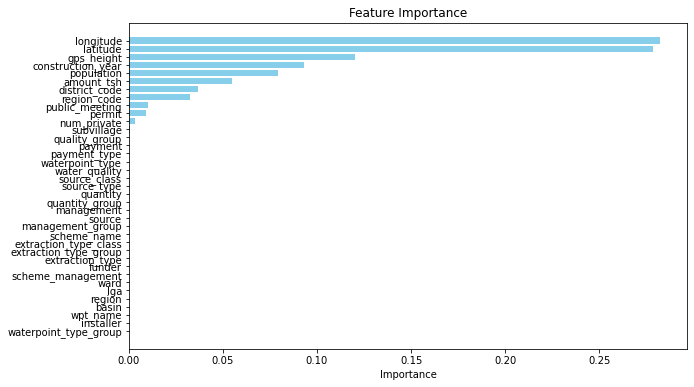

In [5]:
# Display feature importance
importances = clf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print(feature_importance_df.head(10))  # Top 10 features

# plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Displaying the most important features at the top
plt.show()

In [6]:
# necessary libraries for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Parameter grid for tuning Random Forest
param_grid = {
    'n_estimators': [50, 100, 200, 300],# Number of trees in the forest
    'max_depth': [None, 10, 20, 30],# Maximum depth of each tree
    'min_samples_split': [2, 5, 10],# Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],# Minimum samples required at each leaf node
}
# Setting up GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

# Getting the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Making predictions using the best estimator
y_pred_tuned = grid_search.best_estimator_.predict(X_test)

# Evaluating the model with tuned hyperparameters
print("Accuracy after tuning:", accuracy_score(y_test, y_pred_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 37.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 79.8min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 93.0min finished


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy after tuning: 0.7306397306397306

Classification Report:
                          precision    recall  f1-score   support

             functional       0.75      0.83      0.79      6457
functional needs repair       0.51      0.27      0.35       851
         non functional       0.73      0.68      0.70      4572

               accuracy                           0.73     11880
              macro avg       0.66      0.59      0.61     11880
           weighted avg       0.72      0.73      0.72     11880


Confusion Matrix:
 [[5355  149  953]
 [ 428  228  195]
 [1403   72 3097]]


Fitting the GridSearchCV to the training data perform cross-validation and check all the combinations of hyperparameters in the grid.Once the grid search is complete,we extracted the best parameters found and evaluated the model.

Accuracy: the model achieved an accuracy of approximately 73.06% on the test set,  a relatively good score.

Precision: The proportion of positive predictions that were correct.(Higher precision means fewer false positives.)
  * Functional (0.75): 75% of the "functional" predictions were correct.
  * Functional needs repair (0.51): Only 51% of "functional needs repair" predictions were correct.
  * Non-functional (0.73): 73% of "non-functional" predictions were correct.
         
Recall: The proportion of actual positive cases that were correctly predicted. (Higher recall means fewer false negatives.)
  * Functional (0.83): 83% of the actual "functional" cases were correctly identified.
  * Functional needs repair (0.27): Only 27% of the actual "functional needs repair" cases were correctly identified.                                               indicating that the model is struggling to identify this class correctly.
  * Non-functional (0.68): 68% of the actual "non-functional" cases were correctly identified.

              Feature  Importance
4           longitude    0.259570
5            latitude    0.256236
2          gps_height    0.107275
20  construction_year    0.105789
15         population    0.075939
0          amount_tsh    0.073387
12      district_code    0.047582
11        region_code    0.044743
16     public_meeting    0.013245
19             permit    0.011625


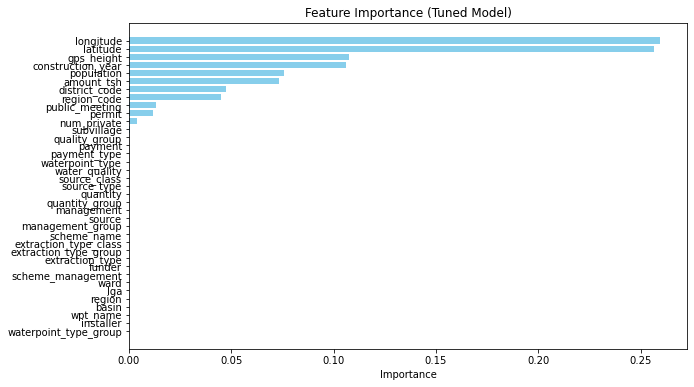

In [7]:
# Displaying feature importance with the tuned model
importances_tuned = grid_search.best_estimator_.feature_importances_
feature_importance_df_tuned = pd.DataFrame({'Feature': feature_names, 'Importance': importances_tuned}).sort_values(by='Importance', ascending=False)

print(feature_importance_df_tuned.head(10))  # Top 10 features

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_tuned['Feature'], feature_importance_df_tuned['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance (Tuned Model)')
plt.gca().invert_yaxis()  # To display the most important features at the top

### Conclusion
   In this project, we developed a machine learning model to predict the condition of water wells in Tanzania, which is critical for optimizing water resources and ensuring that NGOs and government agencies can focus their efforts on wells in need of repair. We approached this problem using a ternary classification framework, which are both interpretable and effective for this type of classification task.

Data Preprocessing: We carefully handled the dataset by addressing missing values, encoding categorical features, and engineering new features like the well's age based on its installation year. This allowed us to prepare the dataset for optimal performance in the models.

Model Development: We started by building a baseline model, to evaluate their ability to predict well conditions. The model performed well, but to achieve even better results, we applied hyperparameter tuning using GridSearchCV. This step enabled us to find the optimal settings for each model, improving their performance.

Hyperparameter Tuning: By using GridSearchCV, we explored a wide range of hyperparameters. The search space was large, leading to a high number of model fits, but with parallel processing enabled, we managed to reduce the time required for training.

Model Evaluation: The models were evaluated using metrics like accuracy, precision, recall, and F1-score. These metrics provided a comprehensive understanding of the models' performance, especially in a classification task with multiple categories.

Alternative Approaches: Given the large search space for hyperparameters, we also discussed using RandomizedSearchCV as a more efficient alternative to GridSearchCV. This approach would help speed up the hyperparameter tuning process by sampling a smaller number of hyperparameter combinations, offering a good trade-off between exploration and computation time.

Model Deployment and Use Cases: The final tuned models can be used for several applications, such as predicting which wells are functional or in need of repair. These predictions can help prioritize maintenance efforts, aiding both NGOs and the government in optimizing resource allocation and decision-making. Furthermore, the models provide valuable insights into the factors contributing to well failure, which could inform better planning and construction of future wells.

   In summary, by leveraging machine learning, we can create an impactful solution to improve the management and maintenance of water wells in Tanzania. The predictive models developed in this project provide valuable insights that can support informed decision-making, ultimately helping to ensure that the population has access to clean and reliable water sources.



